# **Predictive Modelling of Energy Consumption on UBC Campus Using Machine Learning**
### Christin Wang 85960292

# **1. Introduction**

As one of Canada's leading research universities, UBC has a variety of buildings ranging from laboratories and teaching buildings to student dormitories and recreational facilities, each with unique energy requirements. Effective management of these energy consumptions is crucial, as it not only saves costs but also supports UBC's sustainable development plan. UBC is committed to reducing carbon emissions through its Climate Action Plan 2030 (CAP 2030), with the goal of achieving net zero emissions by 2035. This goal builds on the success of CAP 2020, which significantly reduced greenhouse gas emissions while expanding its campus. The key to achieving these goals is to understand and optimize the energy use of different buildings. UBC's innovative energy systems, such as bioenergy research Demonstration facilities and Campus Energy Centre(CEC), demonstrate its commitment to sustainable energy management. 

The dataset chosen for this project is the Building Energy and Water Data published by UBC Energy & Water Services as part of UBC’s Campus as a Living Lab initiative.
The enormous database is split into 4 major parts.
Buildings: containing building summary and utility data.
Energy: shows electrical, water, and gas usage (sum over 10 min) based on different time periods.
Historian: contains analyzed historical weather data.
Weather: shows present, forecasted, and historical weather data including humidity, temperature, and daytime.
According to Amasyali, K., & El-Gohary, N. M., there are 2 main approaches for building energy consumption prediction. One is the physical modelling approach, which requires building construction details, operation schedules, energy consumption, and weather information. The other one is a data-driven approach, which builds on prediction modelling and learns from historical/available data for prediction.
We aim to merge sectors from the 4 major datasets and form 1 dataset containing key factors that will influence energy consumption.

## **Objective**
Large university campuses like UBC’s energy consumption can fluctuate due to a variety of factors, such as the type of building, weather conditions, whether or not it is in an academic semester, and so on. To better understand the energy consumption of the campus and make predictions about future consumption would align with UBC’s sustainability goals and allow the university to manage energy more efficiently, save costs and reduce carbon emissions. In this project, we will try to use machine learning techniques to create predictive models of energy consumption in different buildings on the UBC campus. The model can provide insights into future energy consumption trends to help UBC plan for future energy needs and conserve energy effectively.


## **Research Questions**
What is the current building energy consumption of the campus?

What are the key factors that influence energy consumption across different building types(e.g. Academic, Residential, Research)?

How accurate are the predictions that are made with machine learning?

How can UBC use the results to optimize energy usage and reduce costs?


# **2. Data Import & Cleaning**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.transforms as transforms
%matplotlib inline

Import the data, remove units and convert to numeric.

In [2]:
url = "https://raw.githubusercontent.com/Speculatorrr/ECON323_Project/refs/heads/main/ENERGY_DATA.csv"

In [3]:
df = pd.read_csv(url)
df.head()

,id,shortName,longName,Type,bldgNum,yearBuilt,area,Electrical EUI 2023,Hot Water EUI 2023,Gas EUI 2023,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,AERL,Aquatic Ecosystems Research Laboratory,Academic,316,2005.0,5368.0m²,63.0kWh/m²,78.6kWh/m²,0,...,1883.3kWh,2118.8kWh,2155.0kWh,1781.0kWh,1602.3kWh,1456.0kWh,1399.8kWh,1358.3kWh,1237.8kWh,1428.0kWh
1,Allard Hall,ALRD,Allard Hall,Academic,482,2011.0,14909.0m²,126.8kWh/m²,0,10.8kWh/m²,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alumni Centre,ALUM,746,Recreational,797,2015.0,4106.0m²,119.3kWh/m²,39.4kWh/m²,4.0kWh/m²,...,460.0kWh,213.0kWh,469.0kWh,236.0kWh,247.0kWh,551.0kWh,518.0kWh,543.0kWh,377.0kWh,486.0kWh
3,AMS Nest,NSUB,AMS Student Nest,Recreational,795,2015.0,22933.0m²,121.6kWh/m²,0,20.3kWh/m²,...,5670.0kWh,5601.0kWh,6140.0kWh,3120.0kWh,2929.0kWh,3781.0kWh,3960.0kWh,3490.0kWh,4460.0kWh,4250.0kWh
4,Ansoc,ANSO,Anthropology and Sociology Building,Academic,048,1950.0,6220.0m²,68.2kWh/m²,93.7kWh/m²,0,...,2280.0kWh,2970.0kWh,2850.0kWh,2970.0kWh,2400.0kWh,1640.0kWh,1809.5kWh,1020.0kWh,640.5kWh,2470.0kWh


In [47]:
df.iloc[0, 19:50]

2020/1/1      992.5
2020/1/2     1224.5
2020/1/3     1170.5
2020/1/4      935.0
2020/1/5     1005.0
2020/1/6     1391.5
2020/1/7     1404.0
2020/1/8     1360.9
2020/1/9     1411.0
2020/1/10    1461.1
2020/1/11    1511.2
2020/1/12    1561.3
2020/1/13    1611.4
2020/1/14    1661.5
2020/1/15    1711.6
2020/1/16    1761.7
2020/1/17    1811.8
2020/1/18    1861.9
2020/1/19    1912.0
2020/1/20    1962.1
2020/1/21    2012.2
2020/1/22    2062.4
2020/1/23    2112.5
2020/1/24    2162.6
2020/1/25    2212.7
2020/1/26    2262.8
2020/1/27    2312.9
2020/1/28    2363.0
2020/1/29    2413.1
2020/1/30    2463.2
2020/1/31    2513.3
Name: 0, dtype: object

In [4]:

for col in df.columns[6:]:
    if df[col].dtype == 'object':  
        df[col] = df[col].str.replace(r"[^\d.]", "", regex=True)  #asked gpt how to take the units out
        df[col] = pd.to_numeric(df[col], errors="coerce") 


df.head()

,id,shortName,longName,Type,bldgNum,yearBuilt,area,Electrical EUI 2023,Hot Water EUI 2023,Gas EUI 2023,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,AERL,Aquatic Ecosystems Research Laboratory,Academic,316,2005.0,5368.0,63.0,78.6,0.0,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,Allard Hall,ALRD,Allard Hall,Academic,482,2011.0,14909.0,126.8,0.0,10.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alumni Centre,ALUM,746,Recreational,797,2015.0,4106.0,119.3,39.4,4.0,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,AMS Nest,NSUB,AMS Student Nest,Recreational,795,2015.0,22933.0,121.6,0.0,20.3,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,Ansoc,ANSO,Anthropology and Sociology Building,Academic,048,1950.0,6220.0,68.2,93.7,0.0,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0


In [5]:
df_new = df.drop(["longName","bldgNum","yearBuilt","id"],axis=1)

In [6]:
df_new

,shortName,Type,area,Electrical EUI 2023,Hot Water EUI 2023,Gas EUI 2023,Electrical EUI 2022,Hot Water EUI 2022,Gas EUI 2022,Electrical EUI 2021,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,Academic,5368.0,63.0,78.6,0.0,0.0,74.5,0.0,62.3,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,ALRD,Academic,14909.0,126.8,0.0,10.8,122.0,0.0,35.4,122.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUM,Recreational,4106.0,119.3,39.4,4.0,117.9,48.6,9.2,108.3,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,NSUB,Recreational,22933.0,121.6,0.0,20.3,125.0,0.0,17.0,115.6,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,ANSO,Academic,6220.0,68.2,93.7,0.0,67.4,85.4,0.0,62.8,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,109.4,0.0,0.0,109.4,180.8,0.0,108.7,...,2330.0,1480.0,3010.0,2610.0,2610.0,1350.0,940.0,960.0,980.0,1250.0
118,USB,Administrative,11598.0,174.4,0.0,0.0,179.2,0.0,0.0,167.0,...,4.7,4.8,4.8,4.2,4.0,3.7,3.7,3.4,3.1,3.8
119,MGYM,Recreational,8945.0,48.4,97.7,0.0,45.5,122.6,0.0,40.2,...,3500.0,4100.0,2500.0,2301.0,2199.0,4400.0,3000.0,2700.0,2201.0,2199.0
120,WESB,Academic,10272.0,48.0,117.8,0.0,56.7,149.9,0.0,56.5,...,5270.0,5429.0,5881.0,3980.0,3960.0,3460.0,3500.0,3240.0,3309.0,4221.0


**I removed several columns, including "longName," "bldgNum," "yearBuilt," "area," and "id." These columns were redundant and irrelevant.**

## **2.1 Electrical energy use from 2020 to 2023**

In [50]:
df1 = df_new.drop(df_new.columns[3:15], axis=1)

In [51]:
df1

,shortName,Type,area,2020/1/1,2020/1/2,2020/1/3,2020/1/4,2020/1/5,2020/1/6,2020/1/7,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,Academic,5368.0,992.5,1224.5,1170.5,935.0,1005.0,1391.5,1404.0,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,ALRD,Academic,14909.0,3352.5,6211.0,5677.5,4762.0,3464.5,6374.0,5906.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUM,Recreational,4106.0,1114.8,1640.3,1528.0,1505.0,1432.5,1795.0,1701.5,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,NSUB,Recreational,22933.0,5766.5,6931.5,7539.5,7095.5,7090.0,9060.0,9085.0,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,ANSO,Academic,6220.0,969.5,1269.0,1292.0,917.0,1006.5,1561.5,1564.0,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,1221.5,1519.0,1389.5,1406.5,1452.5,1766.5,1716.5,...,2330.0,1480.0,3010.0,2610.0,2610.0,1350.0,940.0,960.0,980.0,1250.0
118,USB,Administrative,11598.0,5062.5,6288.8,6206.5,5094.8,5020.3,6765.8,6692.3,...,4.7,4.8,4.8,4.2,4.0,3.7,3.7,3.4,3.1,3.8
119,MGYM,Recreational,8945.0,1210.8,1593.3,1384.8,1167.0,1155.3,1669.0,1718.3,...,3500.0,4100.0,2500.0,2301.0,2199.0,4400.0,3000.0,2700.0,2201.0,2199.0
120,WESB,Academic,10272.0,1113.3,1686.1,1570.4,1058.5,1067.2,1887.9,1809.0,...,5270.0,5429.0,5881.0,3980.0,3960.0,3460.0,3500.0,3240.0,3309.0,4221.0


In [9]:
df_EEU = df1.drop(df1.columns[1464:2925], axis=1)

In [10]:
df_EEU.rename(columns={col: pd.to_datetime(col) for col in df_EEU.columns[3:]}, inplace=True)

df_EEU

,shortName,Type,area,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
0,AERL,Academic,5368.0,992.5,1224.5,1170.5,935.0,1005.0,1391.5,1404.0,...,73715.6,73765.7,73815.8,73865.9,73916.0,73966.1,74016.2,74066.3,74116.4,74166.5
1,ALRD,Academic,14909.0,3352.5,6211.0,5677.5,4762.0,3464.5,6374.0,5906.0,...,303679.2,303885.4,304091.6,304297.8,304504.0,304710.2,304916.4,305122.6,305328.8,305535.0
2,ALUM,Recreational,4106.0,1114.8,1640.3,1528.0,1505.0,1432.5,1795.0,1701.5,...,103627.9,103698.4,103768.9,103839.5,103910.0,103980.5,104051.0,104121.5,104192.0,104262.5
3,NSUB,Recreational,22933.0,5766.5,6931.5,7539.5,7095.5,7090.0,9060.0,9085.0,...,719253.4,719745.0,720236.5,720728.0,721219.6,721711.1,722202.6,722694.2,723185.7,723677.2
4,ANSO,Academic,6220.0,969.5,1269.0,1292.0,917.0,1006.5,1561.5,1564.0,...,108946.5,109020.9,109095.3,109169.7,109244.1,109318.5,109392.9,109467.2,109541.6,109616.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,1221.5,1519.0,1389.5,1406.5,1452.5,1766.5,1716.5,...,107148.3,107221.3,107294.2,107367.2,107440.1,107513.1,107586.1,107659.0,107732.0,107805.0
118,USB,Administrative,11598.0,5062.5,6288.8,6206.5,5094.8,5020.3,6765.8,6692.3,...,246709.3,246875.6,247041.9,247208.2,247374.5,247540.9,247707.2,247873.5,248039.8,248206.1
119,MGYM,Recreational,8945.0,1210.8,1593.3,1384.8,1167.0,1155.3,1669.0,1718.3,...,76115.3,76166.9,76218.5,76270.1,76321.7,76373.3,76424.9,76476.4,76528.0,76579.6
120,WESB,Academic,10272.0,1113.3,1686.1,1570.4,1058.5,1067.2,1887.9,1809.0,...,104236.6,104307.6,104378.6,104449.6,104520.5,104591.5,104662.5,104733.5,104804.5,104875.4


In [32]:
df_EEU.set_index("Type").T.index[3:]

Index([2020-01-03 00:00:00, 2020-01-04 00:00:00, 2020-01-05 00:00:00,
       2020-01-06 00:00:00, 2020-01-07 00:00:00, 2020-01-08 00:00:00,
       2020-01-09 00:00:00, 2020-01-10 00:00:00, 2020-01-11 00:00:00,
       2020-01-12 00:00:00,
       ...
       2023-12-22 00:00:00, 2023-12-23 00:00:00, 2023-12-24 00:00:00,
       2023-12-25 00:00:00, 2023-12-26 00:00:00, 2023-12-27 00:00:00,
       2023-12-28 00:00:00, 2023-12-29 00:00:00, 2023-12-30 00:00:00,
       2023-12-31 00:00:00],
      dtype='object', length=1459)

## **2.2 Hot water energy use from 2020 to 2023**

In [12]:
df_HWE = df1.drop(df1.columns[3:1464], axis=1)

In [13]:
#gpt
df_HWE.columns = df_HWE.columns.str.replace(r"\.1$", "", regex=True)

In [14]:
df_HWE.rename(columns={col: pd.to_datetime(col) for col in df_HWE.columns[3:]}, inplace=True)

df_HWE


,shortName,Type,area,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
0,AERL,Academic,5368.0,1311.0,2142.0,1728.0,1591.9,1654.1,1912.9,1781.0,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,ALRD,Academic,14909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALUM,Recreational,4106.0,429.0,1217.0,1294.0,1310.0,954.0,1472.0,1244.0,...,460.0,213.0,469.0,236.0,247.0,551.0,518.0,543.0,377.0,486.0
3,NSUB,Recreational,22933.0,4220.0,7260.0,6740.0,5970.0,5560.0,7250.0,6490.0,...,5670.0,5601.0,6140.0,3120.0,2929.0,3781.0,3960.0,3490.0,4460.0,4250.0
4,ANSO,Academic,6220.0,1730.0,2110.0,2080.0,520.0,20.0,2750.0,3760.0,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,LTKUC,Academic,3944.0,1669.8,3940.3,2950.0,3359.8,3380.3,2720.0,2580.0,...,2330.0,1480.0,3010.0,2610.0,2610.0,1350.0,940.0,960.0,980.0,1250.0
118,USB,Administrative,11598.0,3.6,6.1,4.3,3.2,3.6,5.9,4.3,...,4.7,4.8,4.8,4.2,4.0,3.7,3.7,3.4,3.1,3.8
119,MGYM,Recreational,8945.0,7800.0,9300.0,7300.0,6700.0,6100.5,5799.5,6500.0,...,3500.0,4100.0,2500.0,2301.0,2199.0,4400.0,3000.0,2700.0,2201.0,2199.0
120,WESB,Academic,10272.0,6170.0,8949.8,7550.3,6000.0,8070.0,9129.8,7540.0,...,5270.0,5429.0,5881.0,3980.0,3960.0,3460.0,3500.0,3240.0,3309.0,4221.0


# **2.3 Different types of buildings**

In [15]:
df_types= df_new.groupby("Type")
df_types
print(df_types.groups.keys())

dict_keys(['Academic', 'Administrative', 'Commercial', 'Other', 'Recreational', 'Residential'])


In [16]:
# For example to rearsch the specific type.
Academic_data = df_types.get_group("Academic")
Administrative = df_types.get_group("Administrative")
Commercial= df_types.get_group("Commercial")
Other= df_types.get_group("Other")
Recreational = df_types.get_group("Recreational")
Residential = df_types.get_group("Residential")

In [17]:
Academic_data

,shortName,Type,area,Electrical EUI 2023,Hot Water EUI 2023,Gas EUI 2023,Electrical EUI 2022,Hot Water EUI 2022,Gas EUI 2022,Electrical EUI 2021,...,2023/12/22.1,2023/12/23.1,2023/12/24.1,2023/12/25.1,2023/12/26.1,2023/12/27.1,2023/12/28.1,2023/12/29.1,2023/12/30.1,2023/12/31.1
0,AERL,Academic,5368.0,63.0,78.6,0.0,0.0,74.5,0.0,62.3,...,1883.3,2118.8,2155.0,1781.0,1602.3,1456.0,1399.8,1358.3,1237.8,1428.0
1,ALRD,Academic,14909.0,126.8,0.0,10.8,122.0,0.0,35.4,122.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANSO,Academic,6220.0,68.2,93.7,0.0,67.4,85.4,0.0,62.8,...,2280.0,2970.0,2850.0,2970.0,2400.0,1640.0,1809.5,1020.0,640.5,2470.0
7,ACEN,Academic,4926.0,59.6,79.7,0.0,50.5,51.5,0.0,50.4,...,1350.3,1439.8,1600.3,1359.8,1310.3,1270.0,1240.0,1219.8,1260.3,1340.0
11,BIOS,Academic,5441.0,558.8,0.0,0.0,0.0,102.7,0.0,557.9,...,21.6,35.9,35.3,16.4,15.8,8.6,6.7,4.8,6.1,17.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,SWNG,Academic,5399.0,60.0,0.0,85.6,59.4,0.0,108.3,64.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,ULTL,Academic,9069.0,279.7,191.3,0.0,268.5,246.2,0.0,299.8,...,4660.0,3130.0,3140.0,2480.0,2300.0,2360.0,2150.0,2130.0,2100.0,2330.0
117,LTKUC,Academic,3944.0,109.4,0.0,0.0,109.4,180.8,0.0,108.7,...,2330.0,1480.0,3010.0,2610.0,2610.0,1350.0,940.0,960.0,980.0,1250.0
120,WESB,Academic,10272.0,48.0,117.8,0.0,56.7,149.9,0.0,56.5,...,5270.0,5429.0,5881.0,3980.0,3960.0,3460.0,3500.0,3240.0,3309.0,4221.0


**Through such classification, we will handle data faster and more accurate to analyze a single type of building.**

# **3. Data Visualization**

tried to make a graph
1. why isn't datetime working
2. how can i sum the EEU/area grouped by type when it is not letting me

In [37]:
df_EEU

,Type,area,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
shortName,,,,,,,,,,,,,,,,,,,,,
AERL,Academic,5368.0,992.5,1224.5,1170.5,935.0,1005.0,1391.5,1404.0,1360.9,...,73715.6,73765.7,73815.8,73865.9,73916.0,73966.1,74016.2,74066.3,74116.4,74166.5
ALRD,Academic,14909.0,3352.5,6211.0,5677.5,4762.0,3464.5,6374.0,5906.0,5931.6,...,303679.2,303885.4,304091.6,304297.8,304504.0,304710.2,304916.4,305122.6,305328.8,305535.0
ALUM,Recreational,4106.0,1114.8,1640.3,1528.0,1505.0,1432.5,1795.0,1701.5,1813.0,...,103627.9,103698.4,103768.9,103839.5,103910.0,103980.5,104051.0,104121.5,104192.0,104262.5
NSUB,Recreational,22933.0,5766.5,6931.5,7539.5,7095.5,7090.0,9060.0,9085.0,9475.9,...,719253.4,719745.0,720236.5,720728.0,721219.6,721711.1,722202.6,722694.2,723185.7,723677.2
ANSO,Academic,6220.0,969.5,1269.0,1292.0,917.0,1006.5,1561.5,1564.0,1523.2,...,108946.5,109020.9,109095.3,109169.7,109244.1,109318.5,109392.9,109467.2,109541.6,109616.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LTKUC,Academic,3944.0,1221.5,1519.0,1389.5,1406.5,1452.5,1766.5,1716.5,1787.9,...,107148.3,107221.3,107294.2,107367.2,107440.1,107513.1,107586.1,107659.0,107732.0,107805.0
USB,Administrative,11598.0,5062.5,6288.8,6206.5,5094.8,5020.3,6765.8,6692.3,6541.1,...,246709.3,246875.6,247041.9,247208.2,247374.5,247540.9,247707.2,247873.5,248039.8,248206.1
MGYM,Recreational,8945.0,1210.8,1593.3,1384.8,1167.0,1155.3,1669.0,1718.3,1620.4,...,76115.3,76166.9,76218.5,76270.1,76321.7,76373.3,76424.9,76476.4,76528.0,76579.6


In [44]:
df_EEU.iloc[0, 2:33]#.sum()

2020-01-01 00:00:00     992.5
2020-01-02 00:00:00    1224.5
2020-01-03 00:00:00    1170.5
2020-01-04 00:00:00     935.0
2020-01-05 00:00:00    1005.0
2020-01-06 00:00:00    1391.5
2020-01-07 00:00:00    1404.0
2020-01-08 00:00:00    1360.9
2020-01-09 00:00:00    1411.0
2020-01-10 00:00:00    1461.1
2020-01-11 00:00:00    1511.2
2020-01-12 00:00:00    1561.3
2020-01-13 00:00:00    1611.4
2020-01-14 00:00:00    1661.5
2020-01-15 00:00:00    1711.6
2020-01-16 00:00:00    1761.7
2020-01-17 00:00:00    1811.8
2020-01-18 00:00:00    1861.9
2020-01-19 00:00:00    1912.0
2020-01-20 00:00:00    1962.1
2020-01-21 00:00:00    2012.2
2020-01-22 00:00:00    2062.4
2020-01-23 00:00:00    2112.5
2020-01-24 00:00:00    2162.6
2020-01-25 00:00:00    2212.7
2020-01-26 00:00:00    2262.8
2020-01-27 00:00:00    2312.9
2020-01-28 00:00:00    2363.0
2020-01-29 00:00:00    2413.1
2020-01-30 00:00:00    2463.2
2020-01-31 00:00:00    2513.3
Name: AERL, dtype: object

In [18]:
df_EEU.set_index("shortName",inplace=True)
date_EEU = df_EEU.iloc[:, 3:]
date_EEU.columns = pd.to_datetime(date_EEU.columns)
df_EEU.head()

,Type,area,2020-01-01 00:00:00,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-04 00:00:00,2020-01-05 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,2020-01-08 00:00:00,...,2023-12-22 00:00:00,2023-12-23 00:00:00,2023-12-24 00:00:00,2023-12-25 00:00:00,2023-12-26 00:00:00,2023-12-27 00:00:00,2023-12-28 00:00:00,2023-12-29 00:00:00,2023-12-30 00:00:00,2023-12-31 00:00:00
shortName,,,,,,,,,,,,,,,,,,,,,
AERL,Academic,5368.0,992.5,1224.5,1170.5,935.0,1005.0,1391.5,1404.0,1360.9,...,73715.6,73765.7,73815.8,73865.9,73916.0,73966.1,74016.2,74066.3,74116.4,74166.5
ALRD,Academic,14909.0,3352.5,6211.0,5677.5,4762.0,3464.5,6374.0,5906.0,5931.6,...,303679.2,303885.4,304091.6,304297.8,304504.0,304710.2,304916.4,305122.6,305328.8,305535.0
ALUM,Recreational,4106.0,1114.8,1640.3,1528.0,1505.0,1432.5,1795.0,1701.5,1813.0,...,103627.9,103698.4,103768.9,103839.5,103910.0,103980.5,104051.0,104121.5,104192.0,104262.5
NSUB,Recreational,22933.0,5766.5,6931.5,7539.5,7095.5,7090.0,9060.0,9085.0,9475.9,...,719253.4,719745.0,720236.5,720728.0,721219.6,721711.1,722202.6,722694.2,723185.7,723677.2
ANSO,Academic,6220.0,969.5,1269.0,1292.0,917.0,1006.5,1561.5,1564.0,1523.2,...,108946.5,109020.9,109095.3,109169.7,109244.1,109318.5,109392.9,109467.2,109541.6,109616.0


In [31]:
tidy_date = date_EEU.T.resample("ME").sum()#.T.stack()
#tidy_date.index.names = ["shortName", "month"]
#tidy_date.name = "total_energy"
tidy_date#.diff()#.head()

shortName,AERL,ALRD,ALUM,NSUB,ANSO,AQUA,ARTC,ACEN,BTF,BBDC,...,GSC,TPPH2,TINF,UBCT2,ULTL,LTKUC,USB,MGYM,WESB,WLIB
2020-01-31,53620.7,231662.9,72575.6,409886.0,64699.8,443021.6,0.0,32248.1,20842.8,273254.6,...,93770.3,235517.5,629078.1,89374.3,273870.7,72297.3,238959.8,61815.9,70430.0,143432.8
2020-02-29,94682.8,399244.1,130278.9,816472.3,126154.2,731313.3,0.0,56518.9,39504.5,359666.0,...,192456.5,607480.7,1658503.8,196665.6,418889.1,132254.6,372978.4,103842.8,128681.2,262121.7
2020-03-31,147812.2,618540.9,204836.9,1329909.0,204039.8,1110761.0,0.0,88117.5,63292.4,488398.0,...,316565.5,1061731.3,2913329.1,330796.6,615793.5,209232.4,553379.8,158982.4,203568.1,414633.9
2020-04-30,188892.3,787257.7,262744.8,1736763.9,265527.4,1398635.7,0.0,112529.0,81975.0,574894.5,...,415402.0,1433186.4,3941402.1,438748.9,761234.8,269245.3,687712.9,201058.1,261949.2,533525.1
2020-05-31,242565.0,1008458.4,338169.5,2259403.0,344716.8,1779752.9,0.0,144442.2,106121.5,699717.3,...,541932.2,1900187.3,5232235.4,575951.2,957425.0,347207.9,867893.6,256537.7,337793.2,687984.8
2020-06-30,280588.3,1164597.2,391776.3,2636274.2,401666.4,2046047.2,0.0,167036.8,123422.4,779397.0,...,633498.8,2244595.2,6185505.0,675995.4,1091846.0,402769.9,992081.1,295466.5,391844.3,798058.2
2020-07-31,337317.6,1398375.6,471501.7,3188897.0,485393.8,2448744.8,0.0,200767.1,148951.1,911036.5,...,767298.9,2738643.0,7551141.6,821105.8,1299056.6,485183.3,1182407.5,354093.1,472018.4,961335.5
2020-08-31,385470.4,1596530.4,539260.7,3661262.9,556885.1,2788724.2,0.0,229391.1,170716.5,1018428.3,...,881829.4,3164743.6,8729602.3,945692.7,1472672.5,555302.0,1342242.3,403670.5,540231.1,1100251.5
2020-09-30,418884.0,1733699.1,586381.0,3992912.8,606990.6,3022471.3,0.0,249245.4,185933.8,1087827.0,...,962431.7,3468359.6,9570053.5,1033809.6,1590472.6,604151.4,1451128.3,437853.0,587752.1,1197026.0
2020-10-31,480223.2,1986447.8,672593.2,4590756.9,697562.1,3457716.2,0.0,285715.9,213545.8,1229747.5,...,1107196.1,4003199.6,11048508.5,1190847.3,1814304.1,693277.5,1656756.1,501225.7,674456.2,1373602.3


In [20]:
print(date_EEU.columns)

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=1460, freq=None)


In [21]:
merge_EEU = pd.merge(df_EEU, tidy_date.reset_index(), on="shortName")
long_EEU = merge_EEU.loc[:, ["shortName", "Type", "area", "month", "total_energy"]]
long_EEU.head()

,shortName,Type,area,month,total_energy
0,AERL,Academic,5368.0,2020-01-31,53620.7
1,AERL,Academic,5368.0,2020-02-29,94682.8
2,AERL,Academic,5368.0,2020-03-31,147812.2
3,AERL,Academic,5368.0,2020-04-30,188892.3
4,AERL,Academic,5368.0,2020-05-31,242565.0


In [22]:
def l(df):
    df["avg_energy"] = df["total_energy"] / df["area"]
    grouped = df.groupby(["Type", "month"])["avg_energy"]
    summary = grouped.agg(avg_energy="mean", sd_energy="std").reset_index()
    return summary

l(long_EEU)

,Type,month,avg_energy,sd_energy
0,Academic,2020-01-31,151.345032,796.143081
1,Academic,2020-02-29,509.734695,2895.344489
2,Academic,2020-03-31,963.109816,5543.188409
3,Academic,2020-04-30,1343.704201,7773.031601
4,Academic,2020-05-31,1813.927967,10521.071584
...,...,...,...,...
283,Residential,2023-08-31,638.391997,920.454740
284,Residential,2023-09-30,631.880133,911.314218
285,Residential,2023-10-31,667.493608,962.927991
286,Residential,2023-11-30,660.042982,952.417392


In [97]:
long_EEU.groupby(["Type","month"])

In [94]:
type_EEU = long_EEU.groupby(["Type","month"])
type_EEU.get_group("Academic")

ValueError: must supply a tuple to get_group with multiple grouping keys

In [ ]:
def line(df, ax, colors):
    _df = df.copy()
    _df["energy_per_area"] = _df["total_energy"] / _df["area"]

    # Group data by 'Type' and 'month'
    group = _df.groupby(["Type","month"])
    summary = group["energy_per_area"].agg(["mean", "std"]).reset_index()
    summary.rename(columns={"mean": "avg_energy", "std": "sd_energy"}, inplace=True)

    # Iterate through building types and plot
    for building_type, color in colors.items():
        type_data = summary.query("Type == @building_type")

        # Plot average energy
        ax[0].plot(
            type_data["month"],
            type_data["avg_energy"],
            label=f"{building_type} Avg",
            color=color,
            linewidth=2
        )

        # Plot standard deviation
        ax[1].plot(
            type_data["month"],
            type_data["sd_energy"],
            label=f"{building_type} StdDev",
            color=color,
            linewidth=2
        )

    # Finalize plot aesthetics
    ax[0].set_title("Average Energy per Unit Area")
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Avg Energy (kWh/m²)")
    ax[0].legend()
    ax[0].grid(True)

    ax[1].set_title("Standard Deviation of Energy per Unit Area")
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("StdDev Energy (kWh/m²)")
    ax[1].legend()
    ax[1].grid(True)


datetime64[ns]


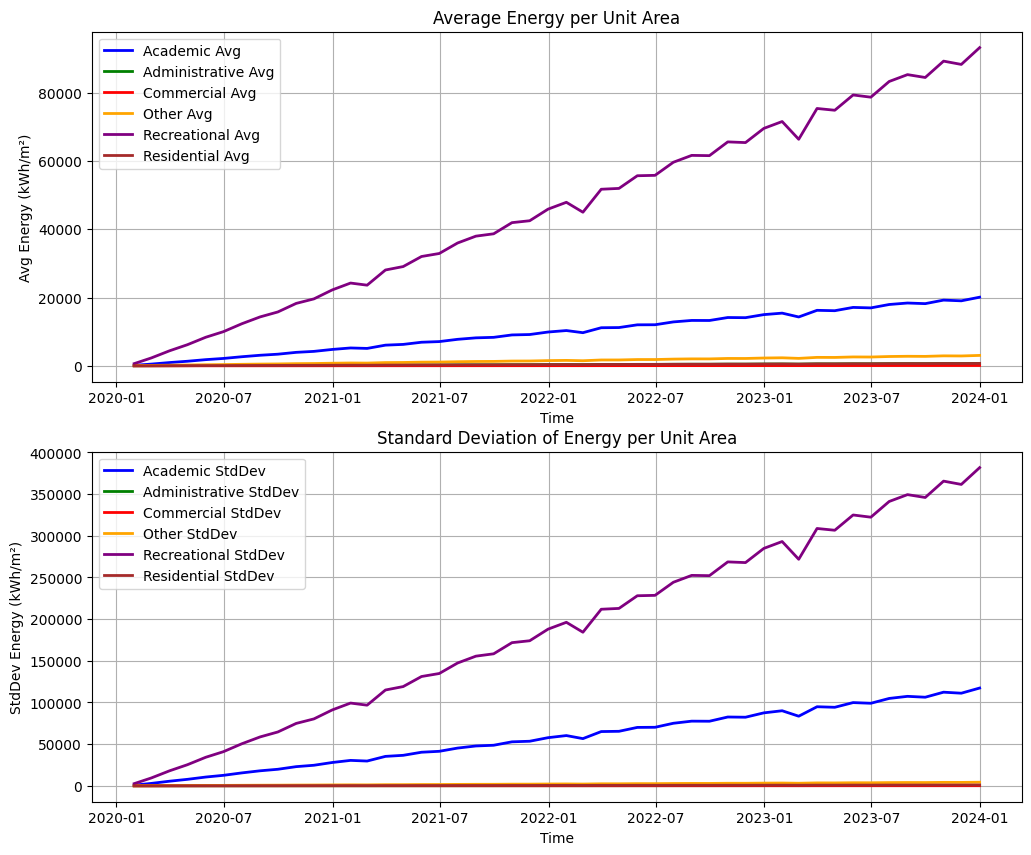

In [103]:
colors = {"Academic": "blue",
    "Administrative": "green",
    "Commercial": "red",
    "Other": "orange",
    "Recreational": "purple",
    "Residential": "brown"}

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
line(long_EEU, ax, colors)
plt.show()
